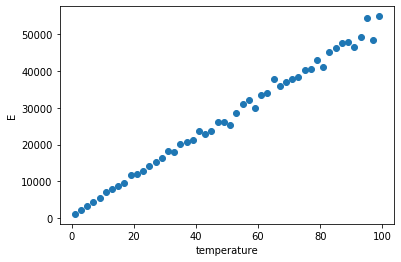

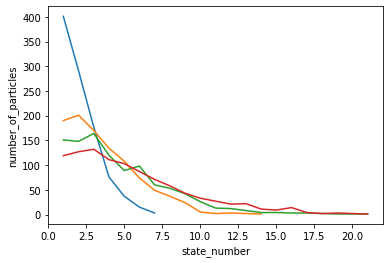

In [2]:
import random 
import numpy as np
import matplotlib.pyplot as plt


def mcs(b,n):
    states=np.ones(n)
    for i in range(n*1000):
        sample = random.randint(0, n-1) # 1, 2번 과정
        
        q = random.random()
        if q < 0.5:
            if states[sample] == 1:
                sample_state = states[sample]
            else:
                sample_state = states[sample]-1
        else:
            sample_state = states[sample]+1 # 3번 과정
            
        de = sample_state**2 - states[sample]**2 # 2, 4번 과정
        
        if de <= 0:
            states[sample] = sample_state # 5번 과정
            
        else:
            p = random.random()
            if p < np.exp(-1*b*de):
                states[sample] = sample_state # 6번 과정
            
    return sum(states**2), states



def plot1(n):
    temp=np.arange(1, 100, 2)
    E=[]
    for t in temp:
        Energy, _ = mcs(1/t,n)
        E.append(Energy)
    plt.xlabel('temperature')
    plt.ylabel('E')
    plt.plot(temp, E, 'o')
    plt.show()
    
def plot2(n):
    temp=np.arange(10, 100, 25)
    for t in temp:
        _, state = mcs(1/t,n)
        states = np.unique(state, return_counts = True)
        plt.plot(states[0], states[1], label='temp=%d' % t)
    plt.xlabel('state_number')
    plt.ylabel('number_of_particles')
    plt.show()
    

plot1(1000)
plot2(1000)